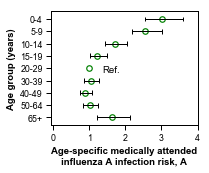

In [1]:
import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import numpy as np
%matplotlib inline

df = pd.read_csv('../final_results_for_ms/0-100/DAHVage_subtype.profile_liks.csv').dropna()
pal = sns.xkcd_palette(['dark sky blue', 'deep red']).as_hex()
h1color=pal[0]
h3color=pal[1]

rcParams['mathtext.default'] = 'regular'
rcParams['font.sans-serif'] = 'arial'
sns.set_context('paper')


df['CI_upper'] = df.prof_max
df['CI_lower'] = df.prof_min
plot_params = {'markersize': 5.5,
               'markeredgewidth': 1.2,
               'color': 'white'}


ylabs = []
yticks = []
index = 0
for i, row in df.iterrows():

    if row.param[0] == 'A':

        plt.hlines(y=-index, xmin=row.CI_lower, xmax=row.CI_upper, linewidth=1)
        plt.vlines(x=row.CI_lower, ymin=-index-0.2, ymax=-index+0.2, linewidth=1)
        plt.vlines(x=row.CI_upper, ymin=-index-0.2, ymax=-index+0.2, linewidth=1)
        plt.plot([row.mle], [-index], 'o', **plot_params, markeredgecolor='green', zorder=1)
        if row.param != 'A65.100':
            ylabs.append(row.param[1:].replace('.','-'))
        else:
            ylabs.append('65+')
        yticks.append(-index)
        index += 1
        
        if row.param == 'A15.19':
            plt.plot([1], [-index], 'o', **plot_params, markeredgecolor='green')
            ylabs.append('20-29')
            yticks.append(-index)
            plt.annotate('Ref.', (1.35, -index - 0.1), va='center')
            index += 1
        
plt.xlabel('Age-specific medically attended\ninfluenza A infection risk, A', weight='bold')
plt.xlim(-0.05, 4)
plt.ylabel('Age group (years)', weight='bold')
plt.yticks(yticks, ylabs)


plt.gcf().set_size_inches(3, 2.5)
plt.tight_layout()
plt.savefig('../../Marshfield/Flu-A-imprinting-paper/Fig_Age_param_estimates.pdf', bbox_inches='tight')

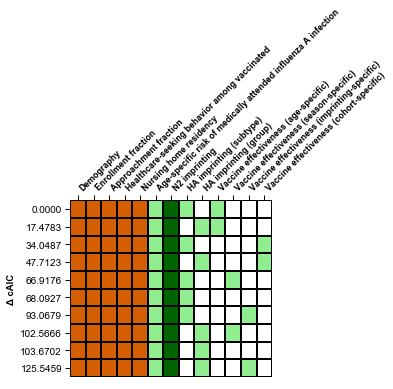

In [6]:
df = pd.read_csv('../final_results_for_ms/0-100/result_summary.csv', index_col='Unnamed: 0')

pal = sns.color_palette('colorblind').as_hex()
flatui = ['white', pal[3], 'darkgreen', 'lightgreen']
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())


rcParams['font.sans-serif'] = 'arial'
sns.set_context('paper')
full_model='DAHNV'

final_df = pd.DataFrame(columns=['D', 'E', 'Ap', 'vac_cov', 'Nu', 'A', 'N2', 'H_sub','H_group', 'V_age', 'V_season', 'V_imprinting', 'V_cohort', 'cAIC'])
row = 0

df = df.iloc[1:, ]

exclude = ['DAHVage_subtype', 'DAHVcohort_subtype']

for model, r in df.iterrows():
    if model not in exclude:
        if 'Vage' in model:
            V = 'V_age'
            final_df.loc[row, V] = 1
        elif 'Vseason' in model:
            V = 'V_season'
            final_df.loc[row, V] = 1
        elif 'Vimprinting' in model:
            V = 'V_imprinting'
            final_df.loc[row, V] = 1
        elif 'Vcohort' in model:
            V = 'V_cohort'
            final_df.loc[row, V] = 1

        if 'H' in model:
            if 'subtype' in model:
                final_df.loc[row, 'H_sub'] = 1
            elif 'group' in model:
                final_df.loc[row, 'H_group'] = 1

        if 'N' in model:

            if r['N2m'] != 0:
                final_df.loc[row, 'N2'] = 0.5
            else:
                final_df.loc[row, 'N2'] = 0.5
        final_df.loc[row, 'A'] = 1
        final_df.loc[row, 'D'] = 0.25
        final_df.loc[row, 'E'] = 0.25
        final_df.loc[row, 'Ap'] = 0.25
        final_df.loc[row, 'vac_cov'] = 0.25
        final_df.loc[row, 'Nu'] = 0.25
        #final_df.loc[row, '']
        final_df.loc[row, 'cAIC'] = r.cAIC
        row += 1

final_df = final_df.sort_values('cAIC')
final_df = final_df.fillna(0)
#final_df['cAIC'] = [np.exp(-0.5 * (c - min(final_df['cAIC']))) for c in final_df['cAIC']]
#final_df.index = ["%.4f" % (c/sum(final_df.cAIC)) for c in final_df['cAIC']]
final_df.index = ["%.4f" % (c - min(final_df['cAIC'])) for c in final_df['cAIC']]
final_df = final_df.loc[:, final_df.columns != 'cAIC']
final_df.columns = ['Demography',
                    'Enrollment fraction',
                    'Approachment fraction',
                    'Healthcare-seeking behavior among vaccinated',
                    'Nursing home residency',
                    'Age-specific risk of medically attended influenza A infection',
                    'N2 imprinting',
                    'HA imprinting (subtype)',
                    'HA imprinting (group)',
                    'Vaccine effectiveness (age-specific)',
                    'Vaccine effectiveness (season-specific)',
                    'Vaccine effectiveness (imprinting-specific)',
                    'Vaccine effectiveness (cohort-specific)']
sns.heatmap(final_df, cmap=my_cmap, linewidths=1, linecolor='black', cbar=False, yticklabels=1)
ax = plt.gca()
ax.xaxis.tick_top()
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=45, ha='left', weight='bold')
plt.ylabel('Δ cAIC', weight='bold')
f = plt.gcf()
f.set_size_inches(5.5, 5.5)
plt.tight_layout()

plt.savefig('../../Marshfield/Flu-A-imprinting-paper/Fig_XX_model_result_summary.pdf', bbox_inches='tight')

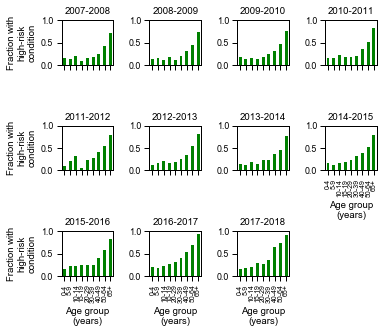

In [13]:
plotdf = pd.read_csv('../raw_data/high_risk_medical_conditions.csv')
subplot = 1
new_labels = ['0-4',
              '5-9',
              '10-14',
              '15-19',
              '20-29',
              '30-39',
              '40-49',
              '50-64',
              '65+']
for season, seasondf in plotdf.groupby('Season'):
    if season != '2009Pan':
        plt.subplot(4,4,subplot)
        temp = seasondf.copy()
        new_rows = []
        
        for ag in set(temp['Age group']):
            hr = int(temp[(temp['Age group'] == ag) & (temp['high risk'])].total)
            lr = int(temp[(temp['Age group'] == ag) & ~(temp['high risk'])].total)
            
            frac = hr / (hr + lr)
            new_rows.append([ag, frac])
            
        temp = pd.DataFrame(new_rows, columns=['Age group', 'frac'])
        temp = temp.sort_values('Age group')
        temp.plot.bar(x='Age group', y='frac', ax=plt.gca(), color='green', legend=False)
        plt.ylim(0, 1)
        plt.title(str(int(season) - 1) + '-' + season)
        
        
        ticks, labels = plt.xticks()
        
        if subplot in [8,9,10,11]:
            plt.xticks(ticks, new_labels, size=7)
            plt.xlabel('Age group\n(years)')
        else:
            plt.xlabel('')
            plt.xticks(ticks, [])
        if subplot in [1, 5, 9]:
            plt.ylabel('Fraction with\nhigh-risk\ncondition')
        else:
            plt.ylabel ('')
        subplot += 1

plt.gcf().set_size_inches(5.5, 5.5)
plt.tight_layout()